# Linear regression 실습

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear regession 직접 구현해보기

In [3]:
# import tf
import tensorflow as tf

# sample data
# y = Wx + b
# W = ?, b = ?
# x_data = [1, 2, 3, 4, 5, 6]
# y_data = [15, 25, 35, 45, 55, 65]

# (later) W = ?, b = ?
x_data = np.array([1, 2, 3, 4, 5, 6], dtype=np.float32)
y_data = np.array([15, 20, 35, 40, 55, 60], dtype=np.float32)

# set W, b as random
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0), name="W")
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0), name="b")

# Hypothesis (Y = Wx + b)
def hypothesis(x):
    return W * x + b

# Cost function (Mean Squared Error)
def cost_fn(x, y):
    return tf.reduce_mean(tf.square(hypothesis(x) - y))

In [4]:
# Optimizer (Gradient Descent)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Training loop
cost_list = []
W_list = []
b_list = []

for step in range(1001):
    with tf.GradientTape() as tape:
        cost = cost_fn(x_data, y_data)
    gradients = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    # Track values
    cost_list.append(cost.numpy())
    W_list.append(W.numpy()[0])
    b_list.append(b.numpy()[0])

    # Print logs every 50 steps
    if step % 50 == 0:
        print(f"Step: {step}, Cost: {cost.numpy()}, W: {W.numpy()[0]}, b: {b.numpy()[0]}")


Step: 0, Cost: 1467.7818603515625, W: 3.7298519611358643, b: 0.41185426712036133
Step: 50, Cost: 6.31222677230835, W: 9.981673240661621, b: 2.2436604499816895
Step: 100, Cost: 6.129119873046875, W: 9.91313362121582, b: 2.5370912551879883
Step: 150, Cost: 6.0020904541015625, W: 9.856045722961426, b: 2.7815001010894775
Step: 200, Cost: 5.913954257965088, W: 9.808494567871094, b: 2.985074758529663
Step: 250, Cost: 5.852807998657227, W: 9.768887519836426, b: 3.1546378135681152
Step: 300, Cost: 5.810390472412109, W: 9.735898971557617, b: 3.2958714962005615
Step: 350, Cost: 5.7809600830078125, W: 9.708419799804688, b: 3.4135098457336426
Step: 400, Cost: 5.760544300079346, W: 9.68553352355957, b: 3.5114951133728027
Step: 450, Cost: 5.746379375457764, W: 9.666470527648926, b: 3.593109369277954
Step: 500, Cost: 5.736549377441406, W: 9.650591850280762, b: 3.661088228225708
Step: 550, Cost: 5.729734897613525, W: 9.637365341186523, b: 3.7177107334136963
Step: 600, Cost: 5.725002288818359, W: 9.626

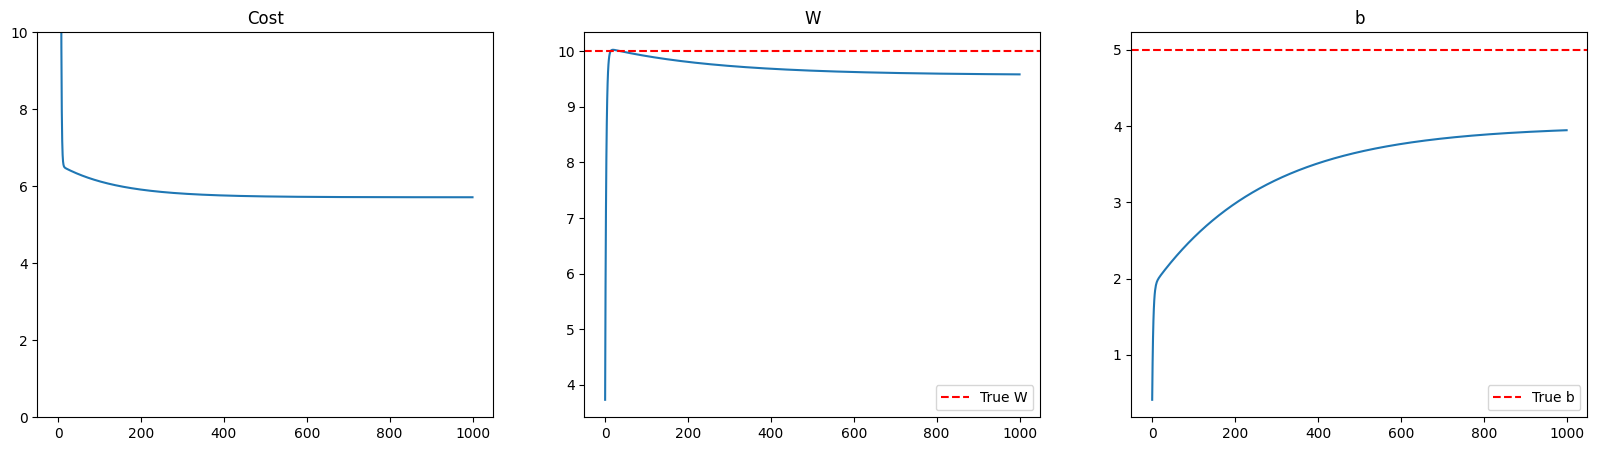

In [5]:
# Visualization: Cost, W, b
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Cost plot
axes[0].plot(cost_list)
axes[0].set_title("Cost")
axes[0].set_ylim([0, 10])

# W plot
axes[1].plot(W_list)
axes[1].axhline(y=10, color='r', linestyle='--', label='True W')
axes[1].set_title("W")
axes[1].legend()

# b plot
axes[2].plot(b_list)
axes[2].axhline(y=5, color='r', linestyle='--', label='True b')
axes[2].set_title("b")
axes[2].legend()

plt.show()

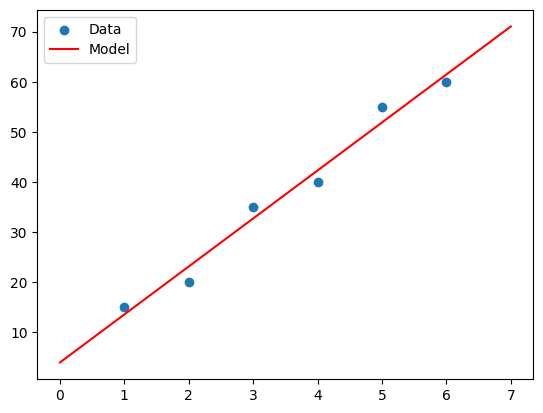

In [6]:
# Visualization: Data and model output
plt.scatter(x_data, y_data, label="Data")
x = np.linspace(0, 7, 100)
y_pred = W.numpy()[0] * x + b.numpy()[0]
plt.plot(x, y_pred, color='red', label="Model")
plt.legend()
plt.show()

## keras를 이용한 구현

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - loss: 2232.8333 - mse: 2232.8333
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 803.4608 - mse: 803.4608
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 291.5864 - mse: 291.5864
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 108.2742 - mse: 108.2742
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 42.6222 - mse: 42.6222
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 19.1053 - mse: 19.1053
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.6774 - mse: 10.6774
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.6533 - mse: 7.6533
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.5645 - mse: 6.5645
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.1689 - mse: 6.1689
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.0219 - mse: 6.0219
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.9640 - mse: 5.9640
Epoch 13/100
1/1 ━━━━━━━

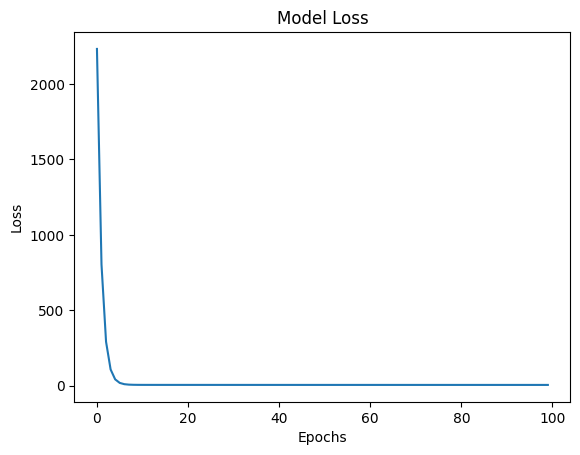

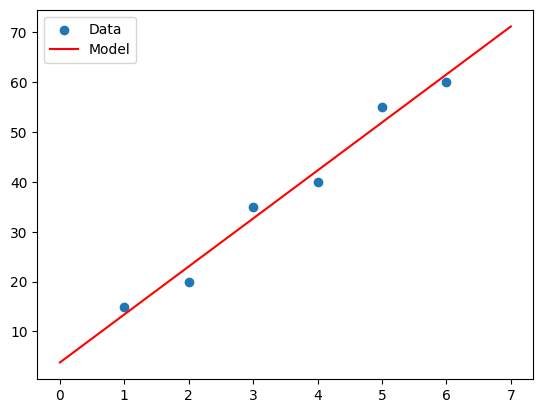

In [8]:
# Model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.05), metrics=['mse'])

# Train the model
history = model.fit(x_data, y_data, epochs=100, batch_size=6, shuffle=True)

# Retrieve weights
W, b = model.layers[0].get_weights()
print('W :', W[0][0], '\tb :', b)

# Visualize results
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot data and regression line
plt.scatter(x_data, y_data, label='Data')
x = np.linspace(0, 7, 100)
y_pred = W[0][0] * x + b
plt.plot(x, y_pred, color='red', label='Model')
plt.legend()
plt.show()